In [2]:
import torch 
import torch.nn.functional as F 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
words = open('names.txt','r') .read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [5]:
chars = sorted(list(set("".join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [6]:
block_size=3 
X,Y = [],[]
for w in words[:5]:
    print(w)
    
    context = [0]*block_size
    for ch in w +'.':
        # print(ch)
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '--->', itos[ix] )
        context = context[1:] + [ix] #crop and append 

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [7]:
# converting 27 dimesntion into 2 dimension lookup sapce 
C = torch.randn((27,2))
C

tensor([[ 0.9079,  0.6769],
        [-0.3270, -0.4418],
        [-0.7961, -0.3699],
        [-1.3864, -1.1090],
        [ 2.4149,  0.0349],
        [-0.1950, -2.0842],
        [ 1.1431, -1.2147],
        [ 0.5659,  0.3040],
        [ 1.0081, -2.0328],
        [-0.0532, -0.0348],
        [ 2.2820,  0.4220],
        [ 0.0380,  0.0162],
        [-1.3871, -0.7639],
        [-0.7311,  0.0467],
        [-1.5514,  0.3056],
        [-0.9489,  1.7569],
        [ 0.9826, -1.4101],
        [ 0.4486, -0.6296],
        [-1.8193,  0.6932],
        [ 1.1549,  0.3395],
        [ 0.1699,  1.3630],
        [ 0.0120, -1.2987],
        [ 0.4920, -1.5178],
        [-0.2413,  1.0691],
        [-1.3179, -0.4080],
        [ 0.2845, -1.7458],
        [-1.7940, -0.1531]])

In [8]:
# to get embedding of 5 value 
C[5]

tensor([-0.1950, -2.0842])

In [9]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [10]:
W1 = torch.randn ((6,100)) 
b1 = torch.randn (100)

In [11]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [12]:
# its not possible to direclty multipe W1 with emb vetor. So , we each emb vecotr and connecting with the other 
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1).shape

torch.Size([32, 6])

In [13]:
# to make it dynamic on the blcok size 
torch.cat(torch.unbind(emb,1),1).shape

torch.Size([32, 6])

In [14]:
emb.view(32,6) == torch.cat(torch.unbind(emb,1),1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [15]:
h=emb.view(32,6) @ W1 +b1
h = emb.view(emb.shape[0],6 ) @ W1 + b1 #inorder to not hardcode the value of value 
h.shape

torch.Size([32, 100])

In [16]:
h = torch.tanh(emb.view(emb.shape[0],6) @ W1 +b1)
h

tensor([[ 0.6661, -0.9872, -0.9903,  ..., -0.9996, -0.8738,  0.4288],
        [ 0.9782, -0.8158, -0.9898,  ..., -1.0000, -0.9829, -0.3322],
        [-0.5664, -0.9995, -0.9998,  ...,  0.7419, -1.0000,  0.9979],
        ...,
        [ 0.9588, -1.0000, -1.0000,  ..., -0.9996, -0.9904,  0.4378],
        [ 0.9854,  0.0960, -1.0000,  ...,  0.9974, -1.0000,  0.9997],
        [ 0.9929,  0.9954, -0.6226,  ...,  0.9925, -0.9944,  0.0372]])

In [17]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [18]:
logits = h @ W2 + b2 
logits.shape

torch.Size([32, 27])

In [19]:
counts = logits.exp()
prob = counts/ counts.sum(1,keepdim=True)


In [20]:
loss = - prob[torch.arange(32), Y ] .log().mean()
loss 

tensor(20.5324)

## Summary 

In [21]:
g= torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2),generator=g) 
W1 = torch.randn ((6,100),generator=g)
b1 =torch.randn(100, generator=g)
W2 = torch.randn((100,27),generator=g) 
b2 = torch.randn (27,generator=g)

In [22]:
parameters = [C,W1,b1,W2,b2]
sum(p.nelement() for p in parameters)#number of parameters in total

3481

In [23]:
emb =C[X] #(32,3,2)
h = torch.tanh(emb.view(emb.shape[0],6)@ W1 +b1)#(32,100)
logits = h@W2+ b2
counts = logits.exp()
prob = counts/ counts.sum(1,keepdim=True)
loss = - prob[torch.arange(32),Y].log().mean()
loss

tensor(17.7697)

In [24]:
# The last 3 lines are basically samething as cross entropy
F.cross_entropy(logits,Y)

tensor(17.7697)

In [25]:
for p in parameters:
    p.requires_grad=True

In [26]:
for _ in range(1000):
# Forward pass 
    emb =C[X] #(32,3,2)
    h = torch.tanh(emb.view(emb.shape[0],6)@ W1 +b1)#(32,100)
    logits = h@W2+ b2
    loss = F.cross_entropy(logits,Y)
    print(loss.item())
    # backward pass 
    for p in parameters: 
        p.grad = None
    loss.backward()

    # Update 
    for p in parameters:
        p.data += -0.1* p.grad  

17.76971435546875
13.656402587890625
11.298770904541016
9.452458381652832
7.984263896942139
6.891323089599609
6.100015640258789
5.452036380767822
4.8981523513793945
4.414664268493652
3.9858498573303223
3.6028308868408203
3.2621421813964844
2.96138072013855
2.6982970237731934
2.469712734222412
2.271660566329956
2.1012842655181885
1.957176923751831
1.8374860286712646
1.7380965948104858
1.6535117626190186
1.5790901184082031
1.5117673873901367
1.449605107307434
1.3913123607635498
1.3359928131103516
1.2830535173416138
1.232191801071167
1.1833821535110474
1.1367993354797363
1.092665195465088
1.0510929822921753
1.012027621269226
0.9752710461616516
0.9405569434165955
0.9076131582260132
0.8761925101280212
0.8460896015167236
0.8171363472938538
0.7891995310783386
0.7621749639511108
0.7359815835952759
0.710558295249939
0.6858615279197693
0.6618656516075134
0.6385658979415894
0.6159821152687073
0.5941662192344666
0.5732107162475586
0.553256630897522
0.5344885587692261
0.5171172618865967
0.501331806

## Training on full dataesets

In [27]:
block_size = 3 
X,Y = [] ,[]
for  w in words:
     
    context =[0] * block_size
    for ch in w+'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        
        context = context[1:] + [ix]
        
X =torch.tensor(X)
Y =torch.tensor(Y) 

In [28]:
print(X.shape)

torch.Size([228146, 3])


In [29]:
g= torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2),generator=g) 
W1 = torch.randn ((6,100),generator=g)
b1 =torch.randn(100, generator=g)
W2 = torch.randn((100,27),generator=g) 
b2 = torch.randn (27,generator=g)
parameters = [C,W1,b1,W2,b2]

for p in parameters:
    p.requires_grad=True
    

for _ in range(100):
# Forward pass 
    ix = torch.randint(0,X.shape[0],(32,))# Creating mini batch with random numebers from 0 to X.shape[0] with count 32 
    
    emb =C[X[ix]] #(32,3,2)
    h = torch.tanh(emb.view(emb.shape[0],6)@ W1 +b1)#(32,100)
    logits = h@W2+ b2
    loss = F.cross_entropy(logits,Y[ix])
    print(loss.item())
    # backward pass 
    for p in parameters: 
        p.grad = None
    loss.backward()

    # Update 
    for p in parameters:
        p.data += -0.1* p.grad  

20.92698860168457
15.702524185180664
12.724508285522461
14.03058910369873
12.986973762512207
14.495001792907715
11.258408546447754
11.156632423400879
12.144179344177246
11.707632064819336
10.466548919677734
9.68681812286377
9.408173561096191
12.418100357055664
8.851509094238281
10.739239692687988
10.071182250976562
9.23859977722168
8.911035537719727
6.728184700012207
9.491762161254883
7.82712984085083
7.972709655761719
7.750968933105469
9.132993698120117
8.034969329833984
6.470133304595947
8.027545928955078
6.1566481590271
7.532284259796143
7.061053276062012
8.43022346496582
6.449040412902832
6.372118949890137
6.757452487945557
5.603832721710205
6.5441107749938965
7.944779396057129
8.575461387634277
6.723752975463867
5.778037071228027
5.527455806732178
6.5284833908081055
4.584911823272705
5.244072437286377
6.269351959228516
4.157344341278076
6.128899097442627
4.882197856903076
6.311655044555664
5.869549751281738
4.121051788330078
6.574248313903809
5.3034539222717285
4.649136543273926
6

In [30]:
## To Find optimal learning rate 
# intead of creating linear spaced intervaled learning, we use exponential learning rate
lre= torch.linspace(-3,0,1000)
lrs = 10 **lre 
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [31]:
g= torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2),generator=g) 
W1 = torch.randn ((6,100),generator=g)
b1 =torch.randn(100, generator=g)
W2 = torch.randn((100,27),generator=g) 
b2 = torch.randn (27,generator=g)
parameters = [C,W1,b1,W2,b2]

for p in parameters:
    p.requires_grad=True
    

lri = []
lossi =[] 

for i in range(1000):
# Forward pass 
    ix = torch.randint(0,X.shape[0],(32,))# Creating mini batch with random numebers from 0 to X.shape[0] with count 32 
    
    emb =C[X[ix]] #(32,3,2)
    h = torch.tanh(emb.view(emb.shape[0],6)@ W1 +b1)#(32,100)
    logits = h@W2+ b2
    loss = F.cross_entropy(logits,Y[ix])
    print(loss.item())
    # backward pass 
    for p in parameters: 
        p.grad = None
    loss.backward()

    # Update 
    lr =lrs[i]
    for p in parameters:
        p.data += -lr* p.grad  
        
    # Track stat
    lri.append(lr)
    lossi.append(loss.item())

18.093320846557617
19.38225746154785
22.945228576660156
16.932071685791016
21.145217895507812
18.668148040771484
18.028045654296875
21.15398597717285
21.959806442260742
21.0367374420166
17.4926700592041
20.177152633666992
19.585765838623047
18.539644241333008
19.968732833862305
19.78650665283203
20.661026000976562
19.212650299072266
18.1096134185791
20.017602920532227
20.310688018798828
17.5798397064209
18.64604377746582
19.631141662597656
17.58652687072754
19.6912899017334
15.885552406311035
17.312137603759766
18.528614044189453
19.730693817138672
21.46608543395996
14.806838035583496
19.18326759338379
17.71295166015625
19.871164321899414
17.832128524780273
17.232969284057617
18.684446334838867
21.680795669555664
17.585433959960938
17.939373016357422
17.824766159057617
19.87413215637207
20.44850730895996
17.355545043945312
19.339805603027344
16.7222957611084
19.889381408691406
19.529552459716797
17.49911880493164
17.052825927734375
18.86394500732422
17.53676414489746
18.58751678466797


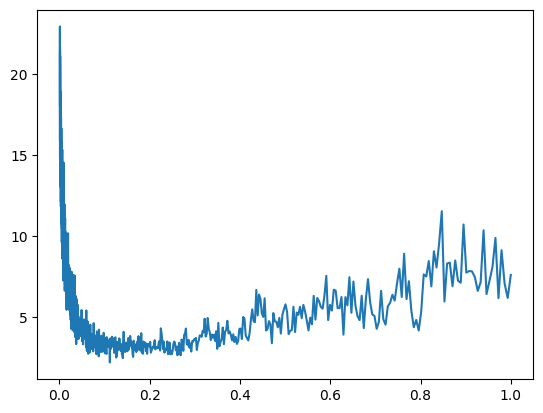

In [32]:
plt.plot(lri,lossi)

In [33]:
#  we fix the learning rate to be 0.1 

g= torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2),generator=g) 
W1 = torch.randn ((6,100),generator=g)
b1 =torch.randn(100, generator=g)
W2 = torch.randn((100,27),generator=g) 
b2 = torch.randn (27,generator=g)
parameters = [C,W1,b1,W2,b2]

for p in parameters:
    p.requires_grad=True
    

for _ in range(10000):
# Forward pass 
    ix = torch.randint(0,X.shape[0],(32,))# Creating mini batch with random numebers from 0 to X.shape[0] with count 32 
    
    emb =C[X[ix]] #(32,3,2)
    h = torch.tanh(emb.view(emb.shape[0],6)@ W1 +b1)#(32,100)
    logits = h@W2+ b2
    loss = F.cross_entropy(logits,Y[ix])
    print(loss.item())
    # backward pass 
    for p in parameters: 
        p.grad = None
    loss.backward()

    # Update 
    lr=0.1
    for p in parameters:
        p.data += -lr* p.grad  

20.159564971923828
18.09086036682129
16.842269897460938
12.609394073486328
16.28974723815918
14.29287338256836
11.888298988342285
12.016626358032227
11.284477233886719
12.65418815612793
11.394305229187012
10.661641120910645
10.929622650146484
12.356679916381836
10.377969741821289
10.851789474487305
7.799307823181152
9.546404838562012
8.068331718444824
11.78642463684082
9.188482284545898
7.942194938659668
10.484282493591309
7.133184909820557
7.015946388244629
6.131353378295898
6.377904891967773
6.321972370147705
6.065736293792725
7.162495136260986
7.901954174041748
7.274309158325195
6.897054195404053
6.164140701293945
9.054081916809082
6.5011491775512695
6.747801303863525
6.97987174987793
5.980952739715576
5.078768253326416
6.521641731262207
6.456655979156494
7.217347145080566
5.704493045806885
5.934782028198242
5.3545613288879395
4.823025226593018
5.029271602630615
4.584321022033691
6.138755798339844
5.3475661277771
4.776758670806885
5.296260356903076
5.333263397216797
5.77815866470336

## train/test/valid split

In [34]:
# building the datasets
def build_dataset(words):
    block_size= 3 #context length : how many character do we to take to predict the next one 
    X,Y = [], [] 
    for w in words:
        context = [0] * block_size 
        for ch in w + ".":
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            
            context  = context[1:] + [ix] #crop and append 
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape,Y.shape)
    return X, Y 


import random 
random.seed(42)
random.shuffle(words)
n1 = int(0.8* len(words))
n2 = int(0.9*len(words))

Xtr,Ytr = build_dataset (words[:n1])
Xdev ,Ydev = build_dataset(words[n1:n2])
Xte,Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [48]:
g=torch.Generator().manual_seed(2147483647)
C = torch.randn ((27,10),generator=g)
W1 = torch.randn((30,200),generator=g)
b1 = torch.randn ((200),generator=g)
W2 = torch.randn((200,27),generator=g)
b2 = torch.randn ((27),generator=g)
parameters = [C,W1,b1,W2,b2]
for p in parameters:
    p.requires_grad = True

In [49]:
sum(p.nelement() for p in parameters)

11897

In [52]:
lre = torch.linspace(-3,0,1000)
lrs = 10 ** lre
stepi =[]
lossi =[]

In [53]:


for i in range(30000):
    # minbatch constraint 
    ix = torch.randint(0,Xtr.shape[0],(32,))
    
    # forward pass 
    emb = C[X[ix]] #(32,3,2)
    h = torch.tanh(emb.view(-1,30) @ W1 +b1) #(32,100)
    logits = h @ W2 +b2 
    loss = F.cross_entropy(logits, Y[ix])
    
    # backward pass 
    for p in parameters: 
        p.grad = None 
    loss.backward()
    
    lr = 0.01 
    for p in parameters: 
        p.data += -lr * p.grad
    
    stepi.append(i)
    lossi.append(loss.item())
print(loss.item())

2.100863456726074


In [55]:
# Use validation data
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30)@W1 + b1 )
logits = h@ W2 + b2 
loss =  F.cross_entropy(logits,Ydev)
loss

tensor(2.5547, grad_fn=<NllLossBackward0>)

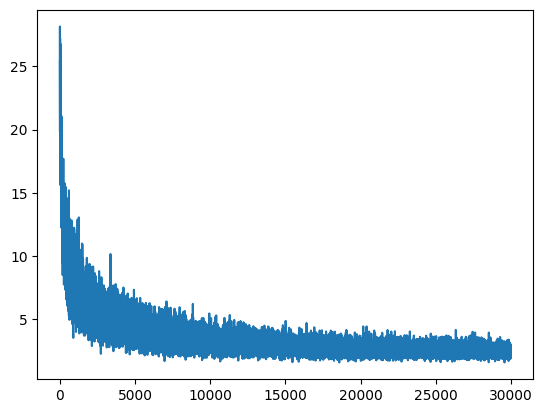

In [56]:
plt.plot(stepi,lossi)

In [57]:
# generate using the model 
g= torch.Generator().manual_seed(2147483647)

for _ in range(20):
    out = []
    context = [0] * block_size
    while True : 
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1,-1)@W1 +b1)
        logits = h @ W2 + b2 
        probs = F.softmax(logits,dim =1)
        ix = torch.multinomial(probs,num_samples=1,generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break 
    print("".join(itos[i] for i in out)) 

dex.
maleah.
mikila.
kayha.
milimitta.
malla.
kzko.
daken.
zyau.
jaber.
iotox.
molyn.
kavi.
kerted.
amariydtese.
suen.
aviyni.
filse.
hllin.
avto.
